In [6]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.metrics import f1_score

import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Load the dataset
crops = pd.read_csv("soil_measures.csv")

In [3]:
# Exploratory analysis - asses missing values
print(crops.isna().sum().sort_values())

# No missing values! 

N       0
P       0
K       0
ph      0
crop    0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB
None
    N   P   K        ph  crop
0  90  42  43  6.502985  rice
1  85  58  41  7.038096  rice
2  60  55  44  7.840207  rice
3  74  35  40  6.980401  rice
4  78  42  42  7.628473  rice
5  69  37  42  7.073454  rice
6  69  55  38  5.700806  rice
7  94  53  40  5.718627  rice
8  89  54  38  6.685346  rice
9  68  58  38  6.336254  rice
                 N            P            K           ph
count  2200.000000  2200.000000  2200.000000  2200.000000
mean     50.551818    53.362727    48.149091     6.469480
std      36.917334    32.985883    50.647931     0.773938
min  

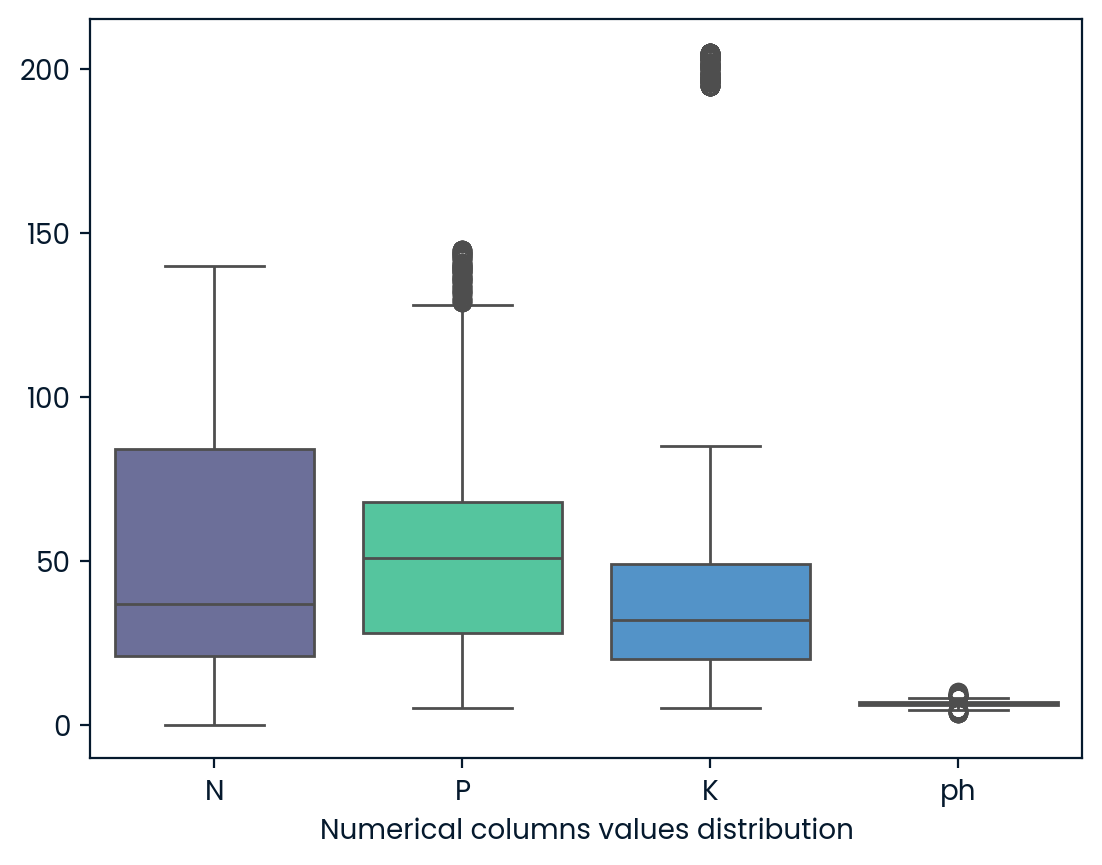

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: crop, dtype: int64
22


In [3]:
# Exploratory analysis - understand the dataframe
print(crops.info())
print(crops.head(10))
print(crops.describe())

sns.boxplot(crops)
plt.xlabel("Numerical columns values distribution")
plt.show()

print(crops['crop'].value_counts())
print(crops['crop'].value_counts().count())

In [4]:
# Subset the data frame to 2 are arrays
X = crops.drop('crop', axis=1)
y = crops['crop']
print(X.shape,y.shape)

(2200, 4) (2200,)


In [ ]:
# Split the arrays to training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y) 

In [35]:
# Note that the project estimated performance with F1-score
# Create a dictionary to store the F1-scores
features_dict ={}

# Create a loop to interate on all feature columns with a logistic regression since the focus is on the 'best' predictive feature
for feature in ['N', 'P','K','ph'] :
    
    pipeline = Pipeline([('scaler', StandardScaler()), # Use a scaler due to scale of ph vs the other feature columns
                          ('log_reg',LogisticRegression(multi_class = 'multinomial'))]) # Specify multinominal due to the number of classes in the target column
    
    pipeline.fit(X_train[[feature]],y_train)
    y_pred = pipeline.predict(X_test[[feature]])
    
    feature_performance = f1_score(y_test,y_pred, average = 'weighted') # I added average weighted in order to aggregate the individual F1 scores across all calsses
    features_dict[feature] = feature_performance 
    print(f"F1-score for {feature}: {feature_performance}")


F1-score for N: 0.10483499038699813
F1-score for P: 0.13997712003244786
F1-score for K: 0.197728925789426
F1-score for ph: 0.07402057412825654


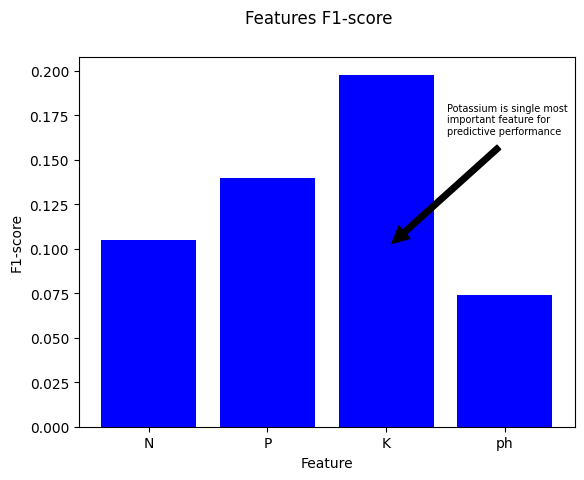

In [51]:
# Visualise the output
labels = list(features_dict.keys())
scores = list(features_dict.values())

fig,ax = plt.subplots()

plt.bar(labels,scores,color='blue')
plt.xlabel('Feature')
plt.ylabel('F1-score')
plt.suptitle('Features F1-score')


# Add text

summary_text = """
Potassium is single most 
important feature for 
predictive performance
"""

fig.text(0.7, 0.75, summary_text, ha='left', va='center', fontsize=7)

# Add an arrow

plt.annotate(text = None,xy=(2,0.1), xytext=(3, 0.16),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=8)
plt.show()

In [50]:
best_feature = max(features_dict,key = features_dict.get)
best_score = features_dict[best_feature]


best_predictive_feature = {best_feature: best_score} # Asked in the project

print(f"The single most important feature for predictive performance is {best_feature}, Potassium")

The single most important feature for predictive performance is K, Potassium
